In [366]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv


## Environment and Required Libraries
This Kaggle Notebook environment includes many useful libraries for analysis.


In [367]:
import numpy as np  # For mathematical operations
import pandas as pd  # For data processing and loading CSV files
import os  # To manage the file system
import random  # To make random choices
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt # For graphic drawings
import ast # To decode data in JSON format


## Loading the Dataset
The dataset was loaded using the `read_csv` function of the `pandas` library. This data set contains metadata information about movies in TMDB
:


In [368]:
df = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

## First Look at the Data Set

We try to understand the data structure by viewing the first few rows of the data set.


In [369]:
print("Original dataset:")
print(df.head())

Original dataset:
      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2 

## Function That Adds NaN Values
In real life, missing values ​​are frequently encountered in data sets. The following function is defined to perform this simulation. The function adds a certain percentage of random NaN values ​​to the data set.i.


In [370]:
def add_random_missing_values(dataframe: pd.DataFrame, missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame."""
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

## Adding NaN Values ​​to the Data Set
Using the above function, 5% NaN values ​​were added to the data set..


In [371]:
df_with_nan = add_random_missing_values(df, missing_rate=0.05)

## View of the Data Set with NaN Values ​​Added
After adding NaN values ​​to the data set, let's view the first few lines and the general structure..


In [372]:
print("Data Set with NaN Values ​​Added:")
print(df_with_nan.head())

Data Set with NaN Values ​​Added:
        budget                                             genres  \
0  237000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000.0  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000.0                                                NaN   
3          NaN  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                      homepage        id  \
0                                          NaN   19995.0   
1                                          NaN     285.0   
2  http://www.sonypictures.com/movies/spectre/  206647.0   
3           http://www.thedarkknightrises.com/   49026.0   
4         http://movies.disney.com/john-carter   49529.0   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 7

In [373]:
original_missing_count = df.isnull().sum().sum()
print(f"Number of missing values ​​in the original data set: {original_missing_count}")

new_missing_count = df_with_nan.isnull().sum().sum()
print(f"Number of missing values ​​in the data set with NaN added: {new_missing_count}")

total_cells = df.size
expected_missing = int(total_cells * 0.05)
actual_missing = new_missing_count - original_missing_count

print(f"Expected number of missing values: {expected_missing}")
print(f"Number of missing values ​​added: {actual_missing}")

Number of missing values ​​in the original data set: 3941
Number of missing values ​​in the data set with NaN added: 8422
Expected number of missing values: 4803
Number of missing values ​​added: 4481


## Discovery of New Dataset

In the first step, we will get a general idea by examining the size of our data set, variable names and the first few lines. This analysis will help us understand the basic structure of the data set.


In [374]:
# Dimensions and column information of the dataset
print(f"Dimensions of the dataset: {df_with_nan.shape}")
print("\nColumn names and types:")
print(df_with_nan.dtypes)

# An overview of the dataset by viewing the first 5 rows
print("\nFirst 5 rows of the data set:")
print(df_with_nan.head())

Dimensions of the dataset: (4803, 20)

Column names and types:
budget                  float64
genres                   object
homepage                 object
id                      float64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
dtype: object

First 5 rows of the data set:
        budget                                             genres  \
0  237000000.0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000.0  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000.0                               

## Summary Statistics

We will analyze each column's mean, standard deviation, and other statistical measures by calculating basic statistics about our data.

In [375]:
print("\nSummary statistics of the dataset:")
print(df_with_nan.describe(include="all"))


Summary statistics of the dataset:
              budget                         genres  \
count   4.559000e+03                           4548   
unique           NaN                           1130   
top              NaN  [{"id": 18, "name": "Drama"}]   
freq             NaN                            354   
mean    2.911015e+07                            NaN   
std     4.076831e+07                            NaN   
min     0.000000e+00                            NaN   
25%     7.785000e+05                            NaN   
50%     1.500000e+07                            NaN   
75%     4.000000e+07                            NaN   
max     3.800000e+08                            NaN   

                                homepage             id keywords  \
count                               1624    4565.000000     4568   
unique                              1605            NaN     4019   
top     http://www.thehungergames.movie/            NaN       []   
freq                           

## Analysis of Missing Values

Missing values ​​analysis is of critical importance in the data cleaning and preprocessing phase. We will examine the rates of missing values ​​in the data set.

In [376]:
missing_counts = df_with_nan.isnull().sum()
missing_percentages = (missing_counts / len(df_with_nan)) * 100

print("\nNumber of missing values:")
print(missing_counts)
print("\nPercentage of missing values:")
print(missing_percentages)


Number of missing values:
budget                   244
genres                   255
homepage                3179
id                       238
keywords                 235
original_language        222
original_title           244
overview                 229
popularity               208
production_companies     257
production_countries     223
release_date             251
revenue                  261
runtime                  222
spoken_languages         221
status                   205
tagline                 1046
title                    219
vote_average             227
vote_count               236
dtype: int64

Percentage of missing values:
budget                   5.080158
genres                   5.309182
homepage                66.187799
id                       4.955236
keywords                 4.892775
original_language        4.622111
original_title           5.080158
overview                 4.767853
popularity               4.330627
production_companies     5.350822
productio

## Distribution of Categorical and Numerical Variables

By analyzing the distribution of categorical and numerical variables in the data, we will explore the characteristics of different types of variables in the data set.

In [377]:
# Parsing of numeric and categorical columns
categorical_columns = df_with_nan.select_dtypes(include=["object"]).columns
numerical_columns = df_with_nan.select_dtypes(include=["int64", "float64"]).columns

print("\nCategorical columns:")
print(categorical_columns)
print("\nNumeric columns:")
print(numerical_columns)

# Summarize the distribution of numeric columns
for col in numerical_columns:
    print(f"\n'{col}' basic statistics of the column:")
    print(df_with_nan[col].describe())



Categorical columns:
Index(['genres', 'homepage', 'keywords', 'original_language', 'original_title',
       'overview', 'production_companies', 'production_countries',
       'release_date', 'spoken_languages', 'status', 'tagline', 'title'],
      dtype='object')

Numeric columns:
Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

'budget' basic statistics of the column:
count    4.559000e+03
mean     2.911015e+07
std      4.076831e+07
min      0.000000e+00
25%      7.785000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

'id' basic statistics of the column:
count      4565.000000
mean      57114.519606
std       88679.134595
min           5.000000
25%        8984.000000
50%       14624.000000
75%       58428.000000
max      459488.000000
Name: id, dtype: float64

'popularity' basic statistics of the column:
count    4595.000000
mean       21.700685
std        32.26

## Examining Correlations and Relationships

We will perform correlation analysis to examine the relationships between variables in the data set. We will also discover important relationships by visualizing the correlation matrix.

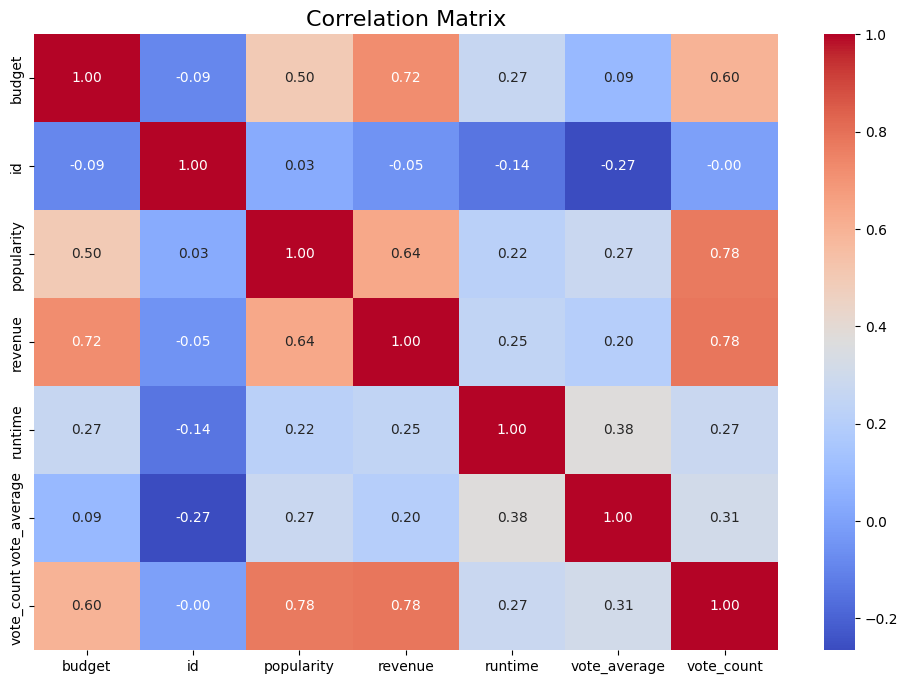

In [378]:
# Calculate correlation matrix by selecting only numeric columns
numeric_df = df_with_nan.select_dtypes(include=["number"])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()


## Data Exploration with Visualization

We will visualize the data using Seaborn and Matplotlib. This will help us better understand the patterns and relationships in the data set.

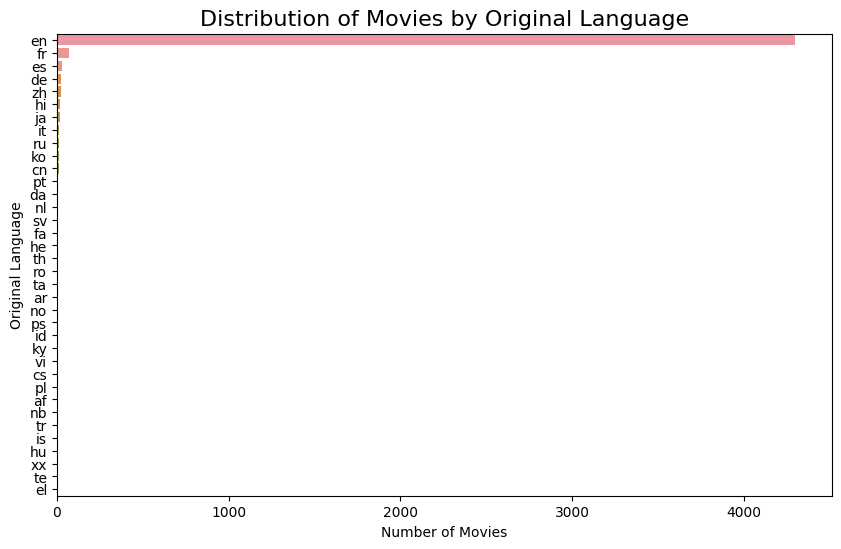

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


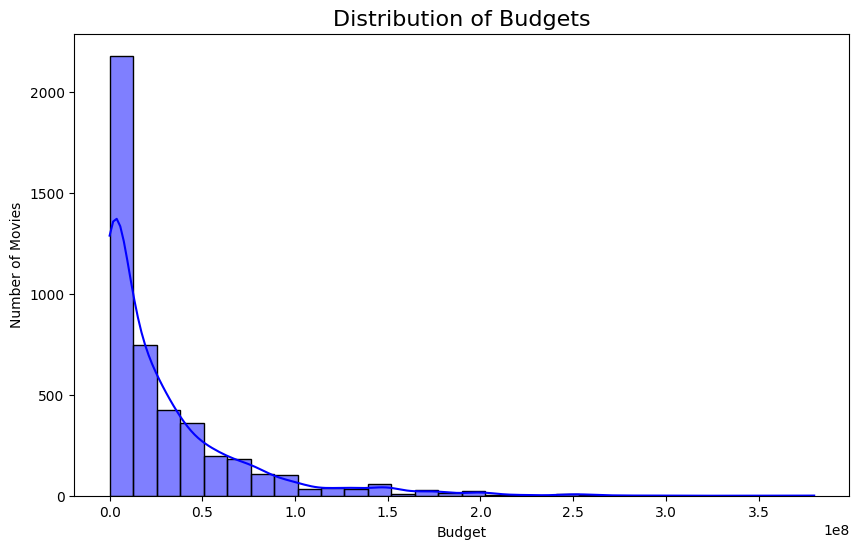

In [379]:
# Distribution of a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(y="original_language", data=df_with_nan, order=df_with_nan["original_language"].value_counts().index)
plt.title("Distribution of Movies by Original Language", fontsize=16)
plt.xlabel("Number of Movies")
plt.ylabel("Original Language")
plt.show()

# Histogram of a numeric variable
plt.figure(figsize=(10, 6))
sns.histplot(df_with_nan["budget"], kde=True, bins=30, color="blue")
plt.title("Distribution of Budgets", fontsize=16)
plt.xlabel("Budget")
plt.ylabel("Number of Movies")
plt.show()

## Data Cleansing and Preprocessing
Data cleaning and preprocessing are critical steps to ensure the accuracy and quality of data before data analysis. In this step, unnecessary or missing data is detected, missing and corrupt data is corrected, and the data set is made ready for analysis.

First, we check the number and distribution of missing values ​​(NaN) in our dataset.

In [380]:
df_with_nan.isnull().sum()

budget                   244
genres                   255
homepage                3179
id                       238
keywords                 235
original_language        222
original_title           244
overview                 229
popularity               208
production_companies     257
production_countries     223
release_date             251
revenue                  261
runtime                  222
spoken_languages         221
status                   205
tagline                 1046
title                    219
vote_average             227
vote_count               236
dtype: int64

In [381]:
missing_data = df_with_nan.isnull().sum() / len(df_with_nan) * 100
missing_data = missing_data[missing_data > 0]
print(missing_data)

budget                   5.080158
genres                   5.309182
homepage                66.187799
id                       4.955236
keywords                 4.892775
original_language        4.622111
original_title           5.080158
overview                 4.767853
popularity               4.330627
production_companies     5.350822
production_countries     4.642932
release_date             5.225900
revenue                  5.434104
runtime                  4.622111
spoken_languages         4.601291
status                   4.268166
tagline                 21.778055
title                    4.559650
vote_average             4.726213
vote_count               4.913596
dtype: float64


Next, we move on to the step of filling in the missing values. This is an important step for the accuracy of the model.

We use median and mean for numerical values.

In [382]:
df_with_nan['runtime'].fillna(df_with_nan['runtime'].mean(), inplace=True)
df_with_nan['vote_average'].fillna(df_with_nan['vote_average'].mean(), inplace=True)
df_with_nan['id'].fillna(df_with_nan['id'].mean(), inplace=True)
df_with_nan['vote_count'].fillna(df_with_nan['vote_count'].mean(), inplace=True)
df_with_nan['budget'].fillna(df_with_nan['budget'].median(), inplace=True)
df_with_nan['revenue'].fillna(df_with_nan['revenue'].median(), inplace=True)

/tmp/ipykernel_30/2320177723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_nan['runtime'].fillna(df_with_nan['runtime'].mean(), inplace=True)
/tmp/ipykernel_30/2320177723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Using Modes for Categorical Values.

In [383]:
df_with_nan['genres'].fillna(df_with_nan['genres'].mode()[0], inplace=True)
df_with_nan['original_language'].fillna(df_with_nan['original_language'].mode()[0], inplace=True)
df_with_nan['spoken_languages'].fillna(df_with_nan['spoken_languages'].mode()[0], inplace=True)
df_with_nan['status'].fillna(df_with_nan['status'].mode()[0], inplace=True)
df_with_nan['release_date'].fillna(df_with_nan['release_date'].mode()[0], inplace=True)
df_with_nan['overview'].fillna(df_with_nan['overview'].mode()[0], inplace=True)
df_with_nan['keywords'].fillna(df_with_nan['keywords'].mode()[0], inplace=True)
df_with_nan['title'].fillna(df_with_nan['title'].mode()[0], inplace=True)
df_with_nan['original_title'].fillna(df_with_nan['original_title'].mode()[0], inplace=True)
df_with_nan['production_companies'].fillna(df_with_nan['production_companies'].mode()[0], inplace=True)
df_with_nan['production_countries'].fillna(df_with_nan['production_countries'].mode()[0], inplace=True)


/tmp/ipykernel_30/2686219118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_nan['genres'].fillna(df_with_nan['genres'].mode()[0], inplace=True)
/tmp/ipykernel_30/2686219118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

Deleting Columns with Too Many Missing Values.

In [384]:
df_with_nan.drop(columns=['homepage', 'tagline'], inplace=True)

## Checking for Missing Values

We check whether the missing data is filled successfully.

In [385]:
missing_data_after = df_with_nan.isnull().sum() / len(df_with_nan) * 100
print(missing_data_after)


budget                  0.000000
genres                  0.000000
id                      0.000000
keywords                0.000000
original_language       0.000000
original_title          0.000000
overview                0.000000
popularity              4.330627
production_companies    0.000000
production_countries    0.000000
release_date            0.000000
revenue                 0.000000
runtime                 0.000000
spoken_languages        0.000000
status                  0.000000
title                   0.000000
vote_average            0.000000
vote_count              0.000000
dtype: float64


This suggests that the missing values ​​in the popularity column were filled in by some method (possibly a statistical value such as mean, median, or mode), resulting in the value replaced by the missing data being the popularity value.

In [386]:
# Check data types
df_with_nan.dtypes


budget                  float64
genres                   object
id                      float64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
title                    object
vote_average            float64
vote_count              float64
dtype: object

## Detecting Duplicate Records
We check if there are duplicate records in our data set.

In [387]:
duplicates = df_with_nan.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")


Number of duplicate records: 0


This output means that there is no duplicate record in our data set.

## Clearing Duplicate Records
If duplicate records are detected, we can follow these steps to clear these records.

In [388]:
df_with_nan_cleaned = df_with_nan.drop_duplicates()

print(f"Cleaned dataset size: {df_with_nan_cleaned.shape}")

Cleaned dataset size: (4803, 18)


In [389]:
duplicates = df_with_nan[df_with_nan.duplicated()]
print(f"Duplicate records:\n{duplicates}")


Duplicate records:
Empty DataFrame
Columns: [budget, genres, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, title, vote_average, vote_count]
Index: []


After data cleaning, it is important to check the change in the number of rows in the data set. The data set will shrink as duplicate records and missing data are cleared. We can check the size of the cleaned dataset as follows:

In [390]:
# Checking the size of the dataset
print(f"Original dataset size: {df.shape}")
print(f"Cleaned dataset size: {df_with_nan_cleaned.shape}")


Original dataset size: (4803, 20)
Cleaned dataset size: (4803, 18)


## Examining the General Distribution of the Data Set
We will review again the basic statistical summaries of the variables in the data set. Especially; We will focus on summary measurements such as standard deviation, mode, median, and mean.

In [391]:
# Basic statistical summary on numeric variables
numeric_summary = df_with_nan_cleaned.describe().T
numeric_summary["mod"] = df_with_nan_cleaned[numerical_columns].mode().iloc[0]
numeric_summary["median"] = df_with_nan_cleaned[numerical_columns].median()

print("Summary statistics of numeric variables:")
print(numeric_summary)

# Identify categorical columns by checking which columns actually exist in the data set
categorical_columns = df_with_nan_cleaned.select_dtypes(include=["object"]).columns

# Analyzing the distribution of categorical variables
for col in categorical_columns:
    print(f"\n'{col}' number of unique values ​​of the categorical variable: {df_with_nan_cleaned[col].nunique()}")
    print(f"Most common values: \n{df_with_nan_cleaned[col].value_counts().head()}")


Summary statistics of numeric variables:
               count          mean           std  min             25%  \
budget        4803.0  2.839333e+07  3.983974e+07  0.0  1000000.000000   
id            4803.0  5.711452e+04  8.645362e+04  5.0     9295.500000   
popularity    4595.0  2.170068e+01  3.226695e+01  0.0        4.753755   
revenue       4803.0  7.925254e+07  1.592183e+08  0.0        0.000000   
runtime       4803.0  1.068799e+02  2.195280e+01  0.0       94.000000   
vote_average  4803.0  6.096809e+00  1.160860e+00  0.0        5.600000   
vote_count    4803.0  6.862343e+02  1.204179e+03  0.0       59.000000   

                       50%           75%           max           mod  \
budget        1.500000e+07  3.800000e+07  3.800000e+08      0.000000   
id            1.640600e+04  5.711452e+04  4.594880e+05  57114.519606   
popularity    1.315282e+01  2.855539e+01  8.755813e+02      8.902102   
revenue       1.944716e+07  8.689029e+07  2.787965e+09      0.000000   
runtime       

## Relationships Between Variables (Correlation Analysis)
We can deepen the correlation matrix by examining which variables have a stronger relationship in the data set. We can also easily understand correlations with visualization.

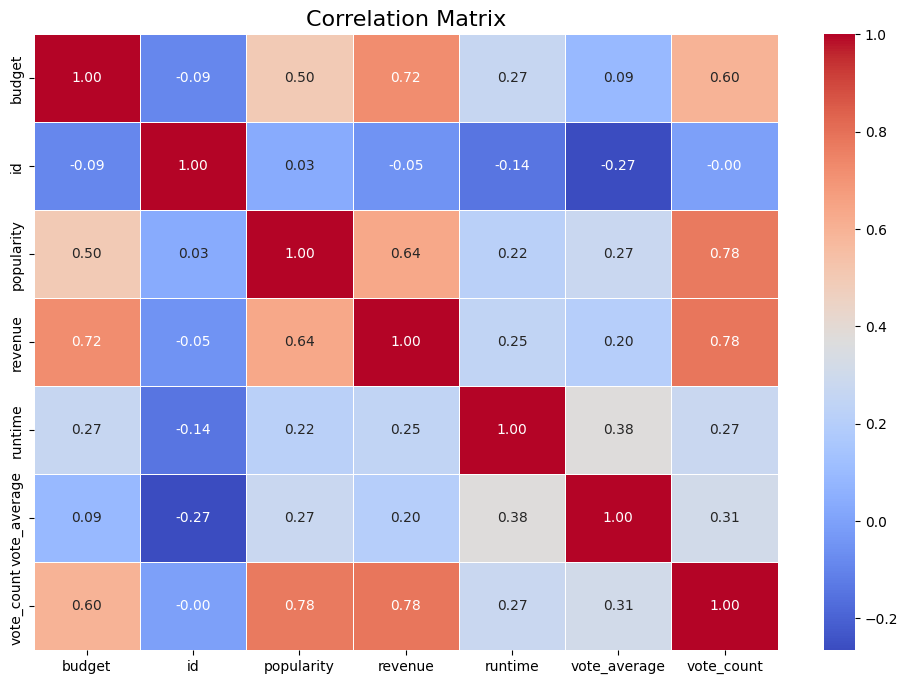

In [392]:
# Correlation matrix and heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()


Additional Analysis: We can use a scatter plot by matching variables with high and low correlations.

Positive high correlations:
budget        budget          1.000000
id            id              1.000000
vote_average  vote_average    1.000000
runtime       runtime         1.000000
popularity    popularity      1.000000
revenue       revenue         1.000000
vote_count    vote_count      1.000000
              revenue         0.783326
revenue       vote_count      0.783326
popularity    vote_count      0.778751
vote_count    popularity      0.778751
budget        revenue         0.719459
revenue       budget          0.719459
              popularity      0.641694
popularity    revenue         0.641694
vote_count    budget          0.596178
budget        vote_count      0.596178
dtype: float64

Negative high correlations:
Series([], dtype: float64)


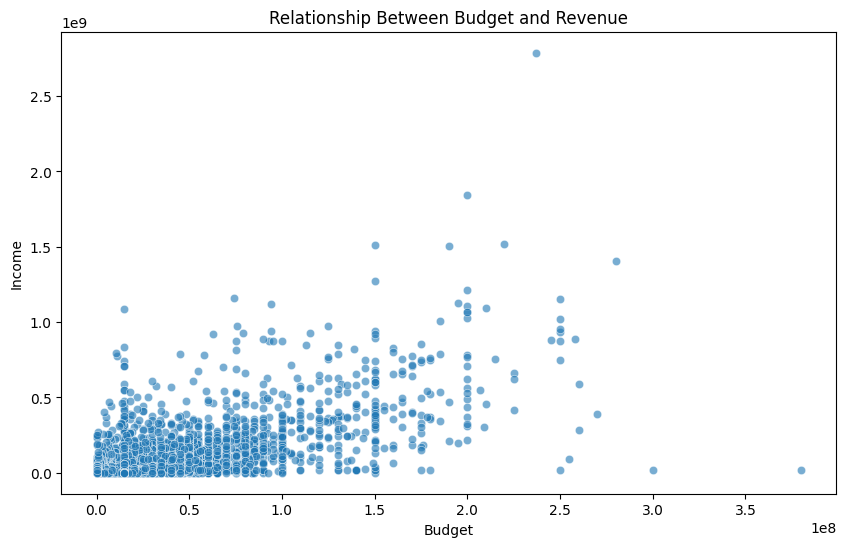

In [393]:
# Positive and negative correlations
high_corr_pairs_positive = high_corr_pairs[high_corr_pairs > 0.5]
high_corr_pairs_negative = high_corr_pairs[high_corr_pairs < -0.5]

print("Positive high correlations:")
print(high_corr_pairs_positive)
print("\nNegative high correlations:")
print(high_corr_pairs_negative)

# Visualization with scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_with_nan_cleaned, x="budget", y="revenue", alpha=0.6)
plt.title("Relationship Between Budget and Revenue")
plt.xlabel("Budget")
plt.ylabel("Income")
plt.show()


## Visualization of Distributions in the Data Set
Data distribution based on histogram and detection of outliers with box plot.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


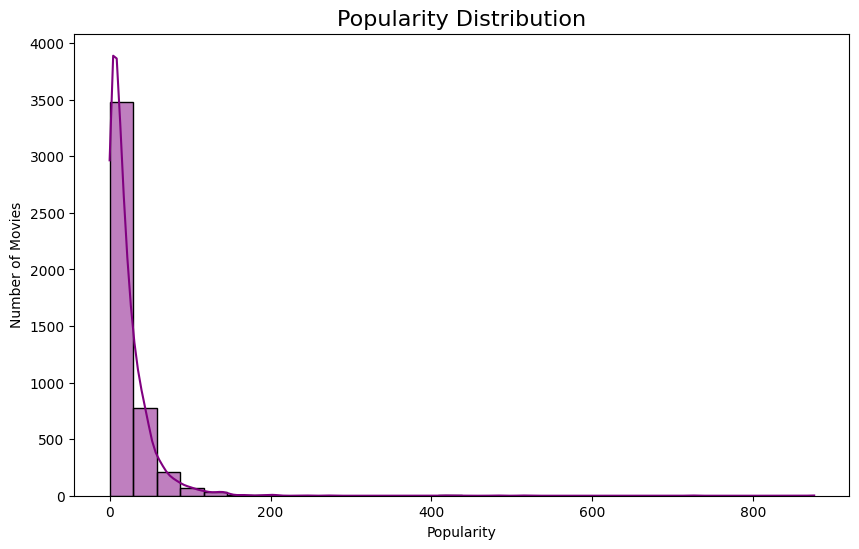

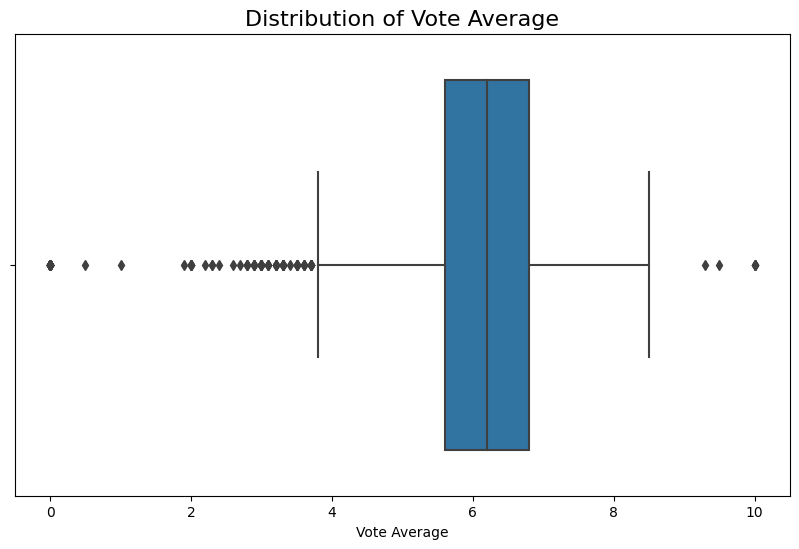

In [394]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df_with_nan_cleaned["popularity"], kde=True, color="purple", bins=30)
plt.title("Popularity Distribution", fontsize=16)
plt.xlabel("Popularity")
plt.ylabel("Number of Movies")
plt.show()

# Box plots (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_with_nan_cleaned["vote_average"])
plt.title("Distribution of Vote Average", fontsize=16)
plt.xlabel("Vote Average")
plt.show()


## Categorical Variables:
Distribution of categorical variables with bar plot.


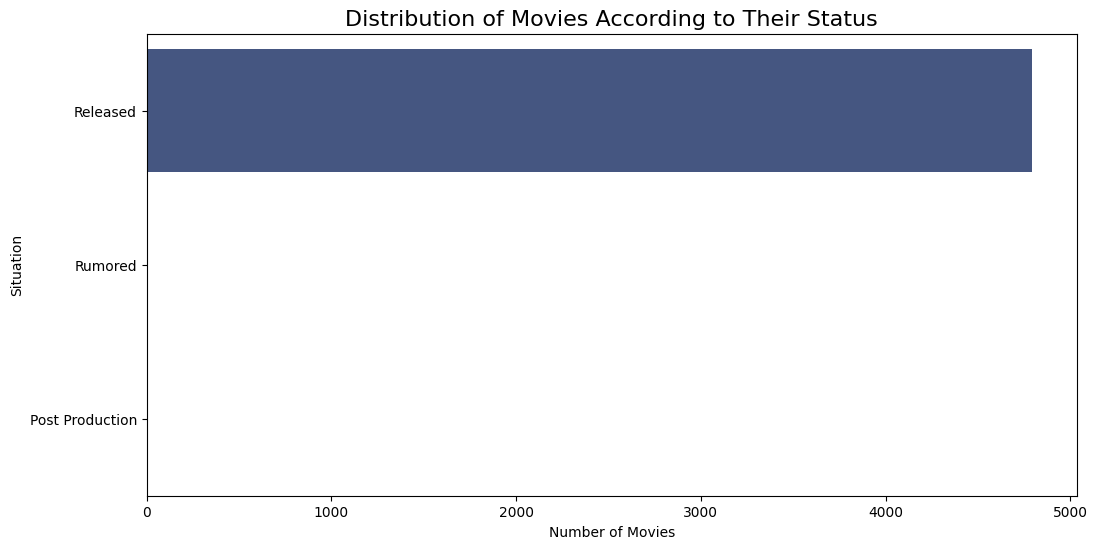

In [395]:
plt.figure(figsize=(12, 6))
sns.countplot(y="status", data=df_with_nan_cleaned, palette="viridis", order=df_with_nan_cleaned["status"].value_counts().index)
plt.title("Distribution of Movies According to Their Status", fontsize=16)
plt.xlabel("Number of Movies")
plt.ylabel("Situation")
plt.show()


## Feature Engineering & Feature Selection
Feature selection and creation of new features can improve model performance. For example, we can create an ROI (Return on Investment) variable using revenue (revenue) and budget (budget).

In [396]:
def extract_main_genre(genre_list):
    try:
        genre_list = ast.literal_eval(genre_list) 
        if len(genre_list) > 0:
            return genre_list[0]["name"]  
        else:
            return None
    except (ValueError, SyntaxError):
        return None

df_with_nan_cleaned["main_genre"] = df_with_nan_cleaned["genres"].apply(extract_main_genre)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


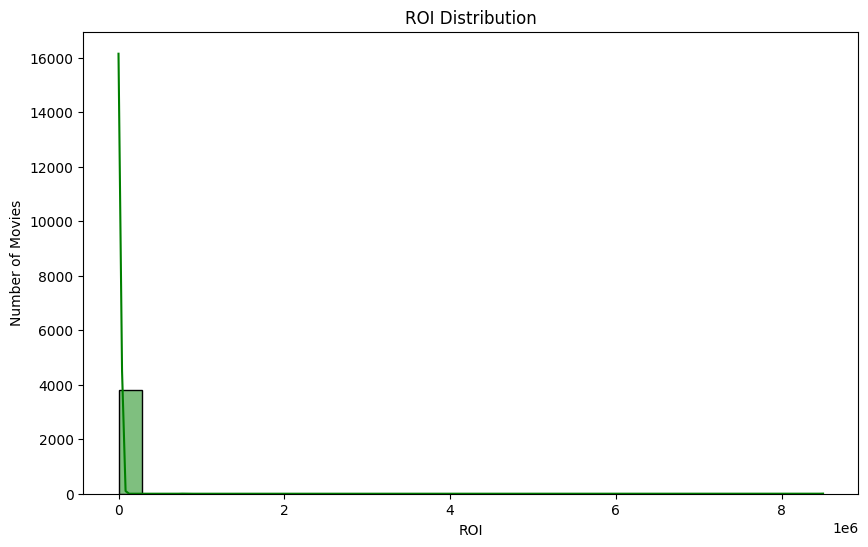

/tmp/ipykernel_30/63001957.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_with_nan_cleaned[col].fillna(df_with_nan_cleaned[col].mean(), inplace=True)
/tmp/ipykernel_30/63001957.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

Dimensions of the original dataset: (4803, 20)
Dimensions of the encoded data set: (4803, 73)


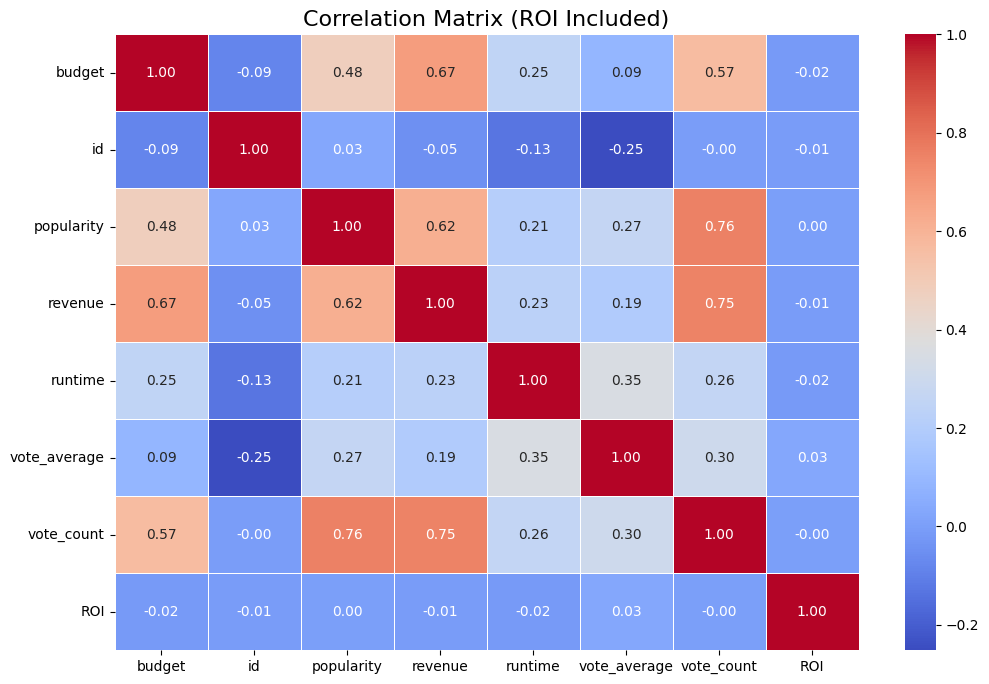

In [397]:
# clear the genres column
df_with_nan_cleaned["main_genre"] = df_with_nan_cleaned["genres"].apply(extract_main_genre)

# ROI calculation
df_with_nan_cleaned["ROI"] = df_with_nan_cleaned.apply(
    lambda row: row["revenue"] / row["budget"] if row["budget"] > 0 else np.nan, axis=1
)


# Visualize the distribution of ROI
plt.figure(figsize=(10, 6))
sns.histplot(df_with_nan_cleaned["ROI"], kde=True, bins=30, color="green")
plt.title("ROI Distribution")
plt.xlabel("ROI")
plt.ylabel("Number of Movies")
plt.show()


# Fill in missing values
for col in numerical_columns:
    df_with_nan_cleaned[col].fillna(df_with_nan_cleaned[col].mean(), inplace=True)

for col in categorical_columns:
    df_with_nan_cleaned[col].fillna(df_with_nan_cleaned[col].mode()[0], inplace=True)

# One-Hot Encoding
categorical_columns = ["original_language", "status", "main_genre"]
df_encoded = pd.get_dummies(df_with_nan_cleaned, columns=categorical_columns, drop_first=True)

# Size control after encoding categorical columns
print(f"Dimensions of the original dataset: {df.shape}")
print(f"Dimensions of the encoded data set: {df_encoded.shape}")

# Correlation Matrix
numeric_df = df_encoded.select_dtypes(include=["number"])
new_correlation_matrix = numeric_df.corr()

# Correlation Matrix Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(new_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (ROI Included)", fontsize=16)
plt.show()


# Conclusion and Recommendations

## Scenario: 

A media company wants to make more accurate budget plans for its new films, predict which types of films will bring in more revenue, and generally establish decision support systems by calculating the return on investments (ROI). The company's goal is to make predictions based on historical data to make the film production process more efficient. This company wants a model that will guide budget and content decisions during film production.


## Problem Description:
The company aims to use data such as historical budgets, revenues, popularity and genres of films to make revenue forecasts for new projects and determine which genres offer high ROI. In this way, it aims to increase its return on investment by making more accurate budgets and content choices in future projects and thus does not want to face the same losses as before.

## Solution Proposal and Model Selection:

In this case, since the most logical solution would be to estimate movie revenue and calculate ROI, a regression-based model should be preferred. This model will focus on projected revenue calculations for each movie, using historical movie data. ROI can also be calculated with this model.

## Selected Model (Random Forest Regressor):
Why Random Forest Regressor?

Random Forest is a tree-based algorithm and is very suitable for making numerical predictions. This model will be very effective for predicting movie revenue with numerical variables (budget, popularity, etc.). Additionally, thanks to decision trees, the model can better learn complex relationships between variables and make highly accurate predictions.
Random Forest minimizes the risk of overfitting and makes unanimous decisions between different trees, which increases the overall accuracy of the model.
Especially on heterogeneous data sets such as movie data (movies of different genres, varying budgets, etc.), Random Forest performs very well.

## Application Area of ​​the Solution:
This model can help the company's film production process:

Budget estimates: Estimated revenues for new films can be calculated from data associated with past films.
Return on investment (ROI): By calculating the ratios between budget and revenue, it can be determined which films offer a higher ROI.
Risk analysis: Advance warnings can be given for high-risk films. For example, low-budget but high-income films can be identified.
Development and Use of the Model:
Data Preparation:

Data Cleansing: Missing values ​​will need to be filled in, unnecessary columns removed, and categorical data (for example, movie genre) will need to be converted to numerical data.
Feature Selection: Numerical features such as budget, income, popularity and categorical features such as movie type and original language should be selected.
Model Tutorial:

Once the Random Forest Regressor is trained, the model's performance can be evaluated with metrics such as RMSE (Root Mean Squared Error). In this way, the accuracy of the predictions is measured and the model can be improved.
Application Area of ​​the Model:

Based on training and testing datasets, the model can make predictions based on budgets and genres of future movie projects.
These predictions will guide filmmakers on which genres of films will generate high revenues and which budgets will yield the most efficient results.